In [29]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
#Load data from data/ folder
conf_dir = os.path.join(os.getcwd(), '..', 'conf')
sys.path.append(conf_dir)
key_stats_df = pd.read_csv('../data/01_raw/all_stocks_stats.csv', index_col = 'ticker')

In [46]:
key_stats_df.head()

,avg10Volume,avg30Volume,beta,companyName,day200MovingAvg,day30ChangePercent,day50MovingAvg,day5ChangePercent,dividendYield,employees,...,sharesOutstanding,ttmDividendRate,ttmEPS,week52change,week52high,week52low,year1ChangePercent,year2ChangePercent,year5ChangePercent,ytdChangePercent
ticker,,,,,,,,,,,,,,,,,,,,,
ALLY,3913238.7,3426109.67,1.071768,"Ally Financial, Inc.",27.09,0.116037,29.94,0.029393,0.018622,8200.0,...,397159000.0,0.60,3.3258,0.182385,32.35,20.60,0.182385,0.497740,0.220630,0.408217
ASB,1149119.2,1132926.40,0.773964,Associated Banc-Corp,22.24,0.058051,21.29,-0.014575,0.030534,4699.0,...,163904000.0,0.64,2.0200,-0.255417,28.45,18.53,-0.255417,-0.092157,0.330460,0.050627
AX,382155.2,340892.97,1.025364,"Axos Financial, Inc.",29.81,-0.020139,28.17,0.001497,NaN,801.0,...,61286000.0,NaN,2.4200,-0.339748,43.16,23.87,-0.339748,0.264550,0.515980,0.059802
BANC,268698.8,317637.33,0.820021,"Banc of California, Inc.",15.12,0.056689,13.91,-0.002853,0.037196,741.0,...,50367000.0,0.52,0.4269,-0.273766,20.45,12.22,-0.273766,-0.296912,0.247892,0.028698
BXS,402206.4,431958.80,0.860521,BancorpSouth Bank,29.31,0.074594,28.63,0.010066,0.022337,4445.0,...,101636000.0,0.65,2.2177,-0.139053,35.39,24.30,-0.139053,-0.001303,0.334204,0.093574


In [48]:
#Inspect data, get column names
key_stats_df.columns


Index(['avg10Volume', 'avg30Volume', 'beta', 'companyName', 'day200MovingAvg',
       'day30ChangePercent', 'day50MovingAvg', 'day5ChangePercent',
       'dividendYield', 'employees', 'exDividendDate', 'float', 'marketcap',
       'maxChangePercent', 'month1ChangePercent', 'month3ChangePercent',
       'month6ChangePercent', 'nextDividendDate', 'nextEarningsDate',
       'peRatio', 'sharesOutstanding', 'ttmDividendRate', 'ttmEPS',
       'week52change', 'week52high', 'week52low', 'year1ChangePercent',
       'year2ChangePercent', 'year5ChangePercent', 'ytdChangePercent'],
      dtype='object')

In [49]:
#Calc additional data: 10-day and 30-day volume over market cap ratio
key_stats_df['avg10VolRatio'] = (key_stats_df.avg10Volume / key_stats_df.marketcap)*100
key_stats_df['avg30VolRatio'] = (key_stats_df.avg30Volume / key_stats_df.marketcap)*100

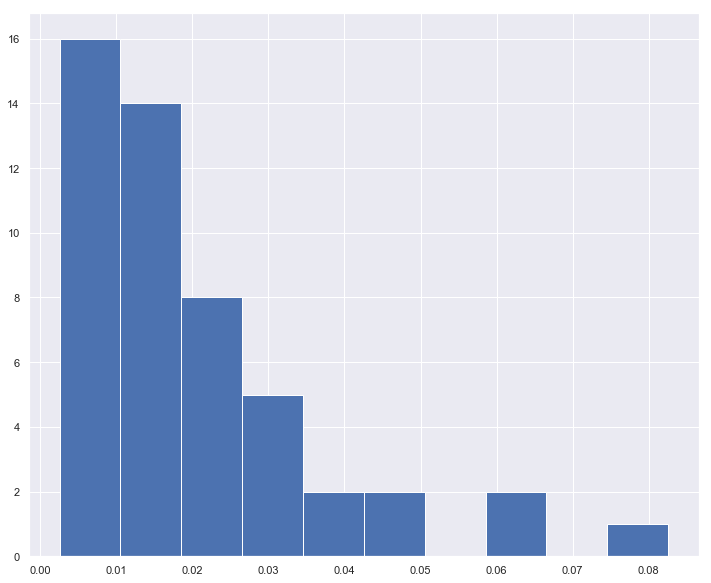

In [53]:
#Clean and inspect data visually, 10-day
key_stats_df.avg10VolRatio.dropna(axis=0, inplace=True)
key_stats_df.avg10VolRatio.hist()

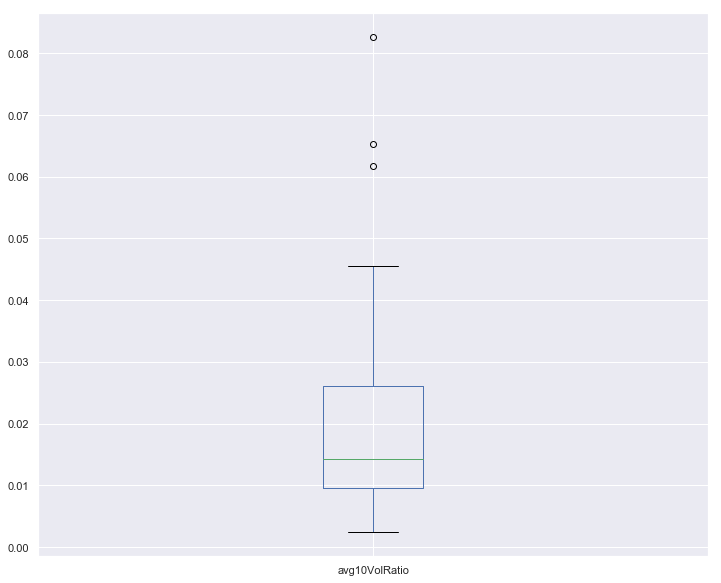

In [54]:
key_stats_df.boxplot(column = 'avg10VolRatio')

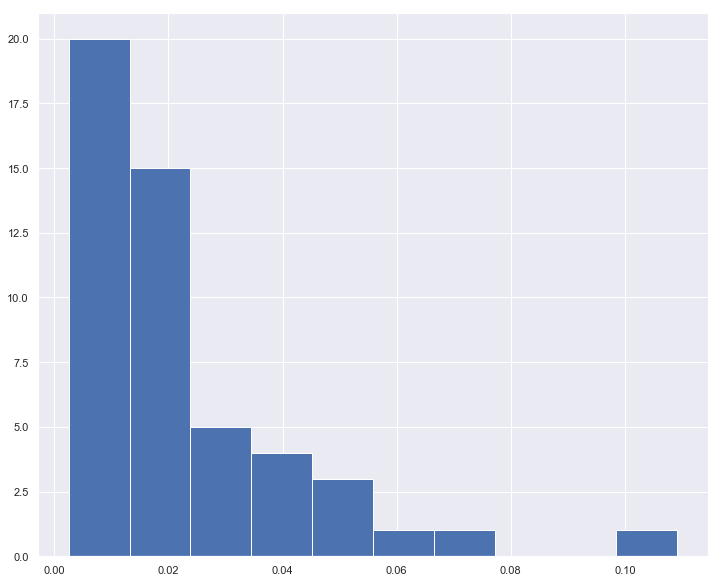

In [55]:
#Clean and inspect data visually, 30-day
key_stats_df.avg30VolRatio.dropna(axis=0, inplace=True)
key_stats_df.avg30VolRatio.hist()

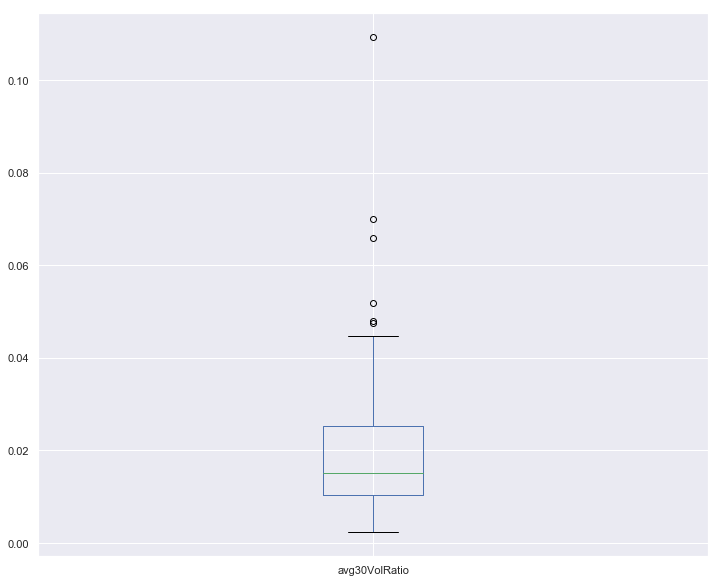

In [56]:
key_stats_df.boxplot(column = 'avg30VolRatio')

Critical t:  0.44664246343132236
Degrees of freedom:  95.06197033663354
P-value:  0.3280745401990973


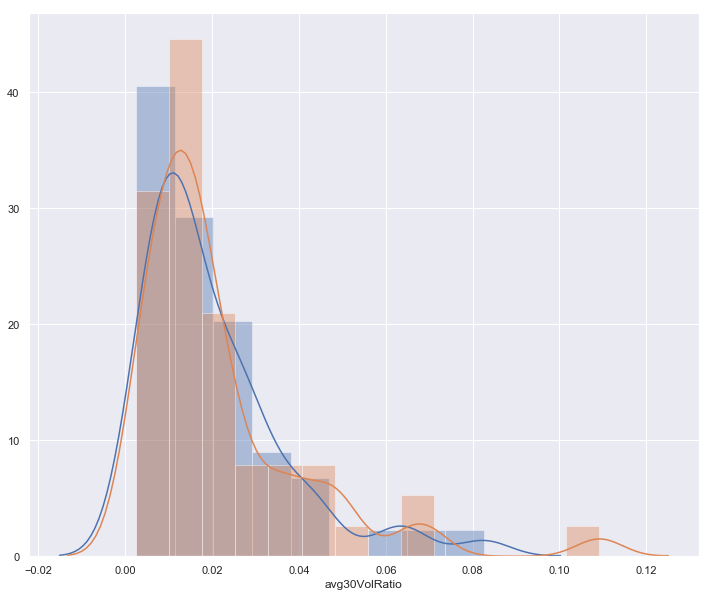

In [57]:

""" 
T-test: Compares the means of a variable from TWO groups. An independent t-test compares the means of two 
different groups (e.g., reaction times on a task for women vs. men), whereas a paired t-test compares the 
means of the same group at two different times (e.g., reaction times for the same people on a task before 
or after a training period).
Just as student's  t-test is a useful adaptation of the normal distribution which can lead to better likelihood 
estimates under certain conditions, the Welch's  t-test is a further adaptation that account for additional 
pertubations in the underlying assumptions of the model. Specifically, the student's  t-test assumes that the 
samples are of equal size and equal variance. When these assumptions are not met, then Welch's  t-test provides a 
more accurate p-value. 
"""

#Welch's Test to compare avgVol/MarcetCap at two different times, using 10-day and 30-day avergages:
import scipy.stats as stats
import numpy as np
#Step 1: compute  welch_t
avg10 = key_stats_df.avg10VolRatio
avg30 = key_stats_df.avg30VolRatio
num1 = avg10.mean() - avg30.mean()
denom1 = np.sqrt(avg10.var(ddof = 1)/len(avg10) + avg30.var(ddof =1)/len(avg30))
welch_t = np.abs(num1/denom1)
print("Critical t: ", welch_t)

#Step 2: compute the effective degrees of freedom fro 2 samples
s1 = avg10.var(ddof=1)
s2 = avg30.var(ddof=1)
n1 = len(avg10)
n2 = len(avg30)
num2 = (s1/n1 + s2/n2)**2
denom2 = (s1/n1)**2/(n1-1)+(s2/n2)**2/(n2-1)
welch_df = num2/denom2
print("Degrees of freedom: ",welch_df)

#Step 3: compute p-value for the to samples using cdf function from scipy library
p_value = 1-stats.t.cdf(welch_t, welch_df)
print("P-value: ",p_value)

#Check Misha's code for the chart
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(avg10) # Blue distribution
sns.distplot(avg30) # Green distribution
plt.show()

#BAsed on the findings we fail to reject H0 that 10-day and 30-day volume over market cap are different 